In [63]:
### IMPORT PACKAGES 
from scipy import integrate
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import string

In [64]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [65]:
#read csv tweet
tweet_df=pd.read_csv("./tweets_data_2500_USA.csv")
tweet_df

,Unnamed: 0,User ID,Date,Language,Text
0,0,1569089016657768448,2022-09-11 22:22:28+00:00,en,All the medical pain and all the taxes spent p...
1,1,1569088754559631365,2022-09-11 22:21:26+00:00,en,A good way to clean up your follower list is t...
2,2,1569086451857358853,2022-09-11 22:12:16+00:00,en,@1zzyzyx1 @MeidasTouch @CharlieCrist legalize ...
3,3,1569086195786985472,2022-09-11 22:11:15+00:00,en,RT @snoopdoggslungz: 📸 Chem D\n🌱(ig) https://t...
4,4,1569085096400982016,2022-09-11 22:06:53+00:00,en,@BabzOnTheMic Off the weed bro. That’s 4 strai...
...,...,...,...,...,...
2495,2495,1567623803655835648,2022-09-07 21:20:14+00:00,en,I just caught someone smoking their weed pen i...
2496,2496,1567623191455215616,2022-09-07 21:17:48+00:00,en,@AesPolitics And research shows black and brow...
2497,2497,1567623151915343874,2022-09-07 21:17:39+00:00,en,Smoke weed “ your not responsible and mentally...
2498,2498,1567621220551507977,2022-09-07 21:09:58+00:00,en,"People who call weed, cannabis. https://t.co/m..."


In [66]:
tweet_df=tweet_df[['Date','Language','Text']]

In [67]:
#choose language = en only 
tweet_df=tweet_df[tweet_df['Language']=='en']
tweet_df.shape

(2500, 3)

In [68]:
#check if any NaN in the df
tweet_df.isna().any()

Date        False
Language    False
Text        False
dtype: bool

In [69]:
#get tweet
tweet=tweet_df['Text']
tweet[:20]

0     All the medical pain and all the taxes spent p...
1     A good way to clean up your follower list is t...
2     @1zzyzyx1 @MeidasTouch @CharlieCrist legalize ...
3     RT @snoopdoggslungz: 📸 Chem D\n🌱(ig) https://t...
4     @BabzOnTheMic Off the weed bro. That’s 4 strai...
5     @IEngageApp My dog + Pain meds, prilocaine (nu...
6                    I need weed but I can’t get uppppp
7                             this weed hit different 💚
8     RT @snoopdoggslungz: 📸 Chem D\n🌱(ig) https://t...
9     I’m not used to a nigga not having hella weed ...
10    RT @CAL_FIRE: #MillFire off Woodridge Court an...
11    @Ac7ionMann Depends....is that weed behind you...
12    @amberdawn4444 @SpaceXplorer11 Interesting tha...
13    #MSOGang 0Cannabis retail: Shrinkage ahead » s...
14    @kathbarbadoro I just finished lunch and smoke...
15    @Tumble____weed @Emrys_Angel i cant lol but i ...
16    that first hit of weed after the gym sends me ...
17    Yes no criminalization for using weed http

## Count the words before cleaning the text

In [70]:
vectorizer_before=CountVectorizer()
before  =  vectorizer_before.fit_transform(tweet)   
vocabulary_before=vectorizer_before.vocabulary_
vocabulary_before = {k: v for k, v in sorted(vocabulary_before.items(), key=lambda x: x[1],reverse=True)}


<BarContainer object of 20 artists>

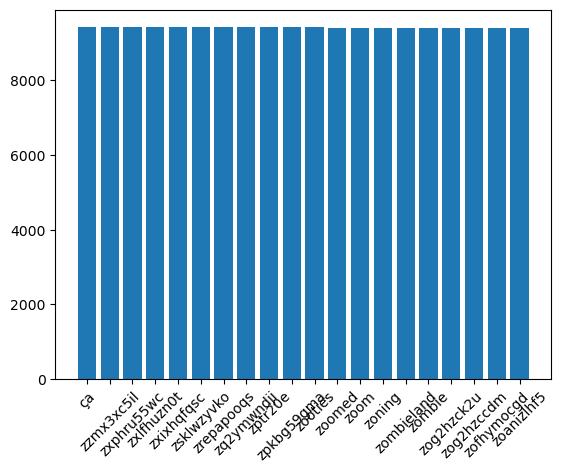

In [71]:
plt.xticks(rotation=45)
plt.bar(list(vocabulary_before.keys())[:20],list(vocabulary_before.values())[:20])


In [72]:
print(list(vectorizer_before.get_feature_names_out())[:150])

['00', '000', '0001', '002wsiszo2', '00ensfupua', '00usd', '01yhjge9yb', '03kxndbiws', '0600', '08', '08krz2qf6r', '08krz2qmvz', '08wwsbpzqm', '09', '0ahww5s89w', '0cannabis', '0cy4xp2tyo', '0sk5yurcld', '0tkok78k6o', '0whlv4ae2k', '0wtobhtc20', '0wvvwn3exm', '0xactivx', '0xuu0wcofc', '10', '100', '1000', '100000000', '10009', '100pcs', '100zillion', '101', '1011', '107sfkttno', '10am', '10ft', '10k', '10kusd', '10million', '10th', '10x', '11', '113', '113b', '118', '11am', '11krkts', '11pm', '11th', '12', '120', '122', '122usd', '12th', '12vvrqk7rk', '13', '130', '14', '140l8ioigx', '143vinyldotcom', '15', '150m', '15eepzquvn', '15mg', '16', '161', '165', '167', '17', '1744195', '18', '180', '18306', '1835974', '1844', '185668232', '1887', '18g', '19', '190', '1933', '1960s', '1970s', '1974', '1980', '1987', '1990s', '1996biggs', '1999', '1afyxaksy8', '1dmhhlf9fr', '1etzm5bbk2', '1f8fzlkhmj', '1fiycpyc2q', '1fsukoqhuf', '1g', '1glswczxby', '1gyn52lgnq', '1j0bhsaf32', '1ji1l5v6xb', '1k

## remove the punchation, dights, symbols, hashtags etc. non-word characters.

In [73]:
#code from https://towardsdatascience.com/cleaning-text-data-with-python-b69b47b97b76

stop_words = stopwords.words("english")
wordnet = WordNetLemmatizer()
def text_preproc(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

tweet_df['clean_text'] = tweet_df['Text'].apply(text_preproc)

In [74]:
vectorizer_after=CountVectorizer(stop_words='english',analyzer = 'word')
after  =  vectorizer_after.fit_transform(tweet_df['clean_text'])   

In [75]:
vocabulary_after=vectorizer_after.vocabulary_
vocabulary_after = {k: v for k, v in sorted(vocabulary_after.items(), key=lambda x: x[1],reverse=True)}

In [76]:
vocabulary_after=vectorizer_after.vocabulary_
print(list(vectorizer_after.get_feature_names_out())[:150])

['aahn', 'aaron', 'ab', 'abc', 'ability', 'able', 'abolished', 'abolitionism', 'abortion', 'abortions', 'abroad', 'absolute', 'absolutely', 'abt', 'abundance', 'abuse', 'abusers', 'accept', 'acceptable', 'accepted', 'accepts', 'access', 'accessory', 'accident', 'accomplished', 'according', 'account', 'accountant', 'accounts', 'accretive', 'accumulate', 'accurately', 'accustomed', 'ace', 'achieved', 'achievement', 'achievements', 'acid', 'acquiring', 'acquisition', 'acre', 'acres', 'acro', 'act', 'acted', 'acting', 'action', 'actions', 'active', 'activist', 'activists', 'activities', 'activity', 'actual', 'actually', 'ad', 'adam', 'adapter', 'add', 'added', 'adderall', 'addict', 'addicted', 'addiction', 'addictions', 'addictive', 'addicts', 'additionally', 'additives', 'addre', 'address', 'addressing', 'adelanto', 'adequate', 'adhd', 'adjustments', 'admin', 'administration', 'admiring', 'admission', 'admitted', 'adolescents', 'adult', 'adulting', 'adults', 'advance', 'advanced', 'advent

<BarContainer object of 20 artists>

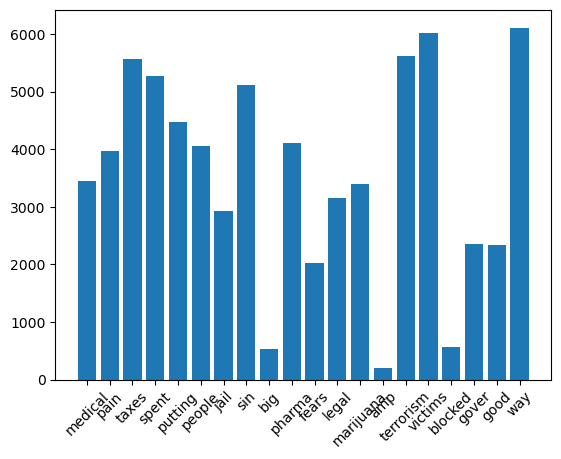

In [77]:
plt.xticks(rotation=45)
plt.bar(list(vocabulary_after.keys())[:20],list(vocabulary_after.values())[:20])